In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
path = "/kaggle/input/g-research-crypto-forecasting/"
df_train = pd.read_csv(path + "train.csv")
df_test = pd.read_csv(path + "example_test.csv")
df_asset_details = pd.read_csv(path + "asset_details.csv")
df_supp_train = pd.read_csv(path + "supplemental_train.csv")

In [3]:
df_train.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24236806 entries, 0 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 1.8 GB


In [5]:
df_asset_details.head()

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


In [6]:
df_train["Asset_ID"].unique()

array([ 2,  0,  1,  5,  7,  6,  9, 11, 13, 12,  3,  8, 10,  4])

[Text(0.5, 0, 'Assets'),
 Text(0, 0.5, 'Number of Rows'),
 Text(0.5, 1.0, 'Data Distribution')]

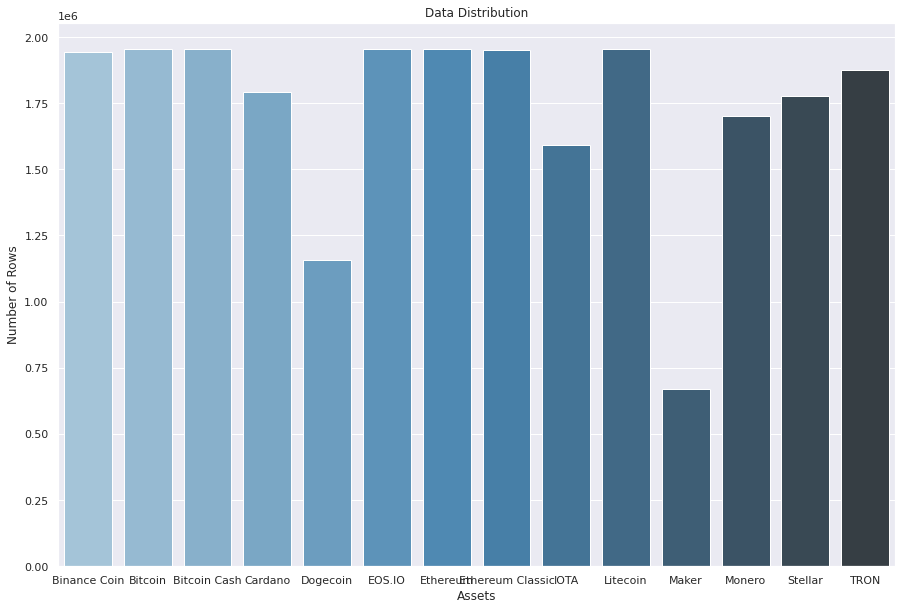

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
asset_count= []
for i in range(14):
    count = (df_train["Asset_ID"]==i).sum()
    asset_count.append(count)
fig = sns.barplot(x = df_asset_details.sort_values("Asset_ID")["Asset_Name"],
             y = asset_count,palette="Blues_d") 
fig.set(xlabel ="Assets", ylabel = "Number of Rows", title ='Data Distribution')

In [8]:
df_asset_details['Name'] = df_asset_details['Asset_Name'].str.replace(" ","_")

In [9]:
df_asset_details

,Asset_ID,Weight,Asset_Name,Name
0,2,2.397895,Bitcoin Cash,Bitcoin_Cash
1,0,4.304065,Binance Coin,Binance_Coin
2,1,6.779922,Bitcoin,Bitcoin
3,5,1.386294,EOS.IO,EOS.IO
4,7,2.079442,Ethereum Classic,Ethereum_Classic
5,6,5.894403,Ethereum,Ethereum
6,9,2.397895,Litecoin,Litecoin
7,11,1.609438,Monero,Monero
8,13,1.791759,TRON,TRON
9,12,2.079442,Stellar,Stellar


In [10]:
## Checking Time Range
dict1={}
for i in range(14):
    dict1[df_asset_details[df_asset_details['Asset_ID']==i]['Name'].values[0]] = df_train[df_train["Asset_ID"]==i].set_index("timestamp") 
    beg = datetime.fromtimestamp(dict1[df_asset_details[df_asset_details['Asset_ID']==i]['Name'].values[0]].index[0]).strftime("%A, %B %d, %Y %I:%M:%S") 
    end = datetime.fromtimestamp(dict1[df_asset_details[df_asset_details['Asset_ID']==i]['Name'].values[0]].index[-1]).strftime("%A, %B %d, %Y %I:%M:%S") 
    print(df_asset_details[df_asset_details['Asset_ID']==i]['Name'].values[0],'data goes from ', beg, ' to ', end) 

Binance_Coin data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Bitcoin data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Bitcoin_Cash data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Cardano data goes from  Tuesday, April 17, 2018 09:11:00  to  Tuesday, September 21, 2021 12:00:00
Dogecoin data goes from  Friday, April 12, 2019 02:34:00  to  Tuesday, September 21, 2021 12:00:00
EOS.IO data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Ethereum data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
Ethereum_Classic data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 2021 12:00:00
IOTA data goes from  Wednesday, May 09, 2018 08:07:00  to  Tuesday, September 21, 2021 12:00:00
Litecoin data goes from  Monday, January 01, 2018 12:01:00  to  Tuesday, September 21, 

Heatmap: Features of BTC

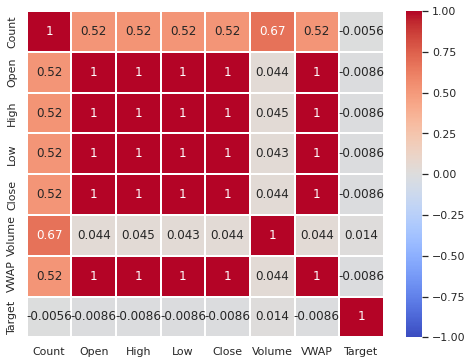

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(dict1['Bitcoin'][['Count','Open','High','Low','Close','Volume','VWAP','Target']].corr(), 
            vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

Candlesticks Charts For Last 200 Minutes

In [12]:
for i in dict1: 
    mini = dict1[i].iloc[-200:] # Select recent data rows

    fig = go.Figure(data=[go.Candlestick(x=mini.index, open=mini['Open'], high=mini['High'], low=mini['Low'], close=mini['Close'])])
    fig.update_xaxes(title_text="$")
    fig.update_yaxes(title_text="Index")
    fig.update_layout(title=i+" Price, 200 Last Minutes")
    fig.show()


Plotting closing prices

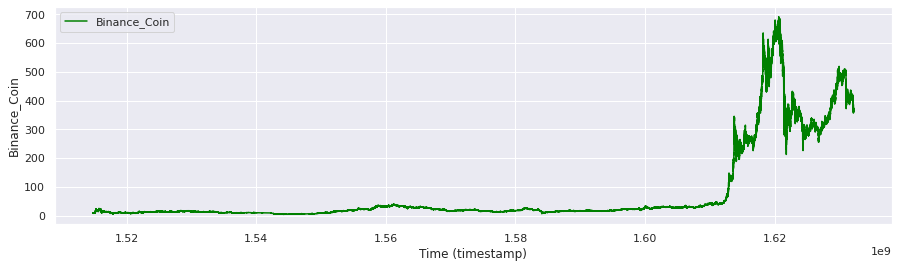

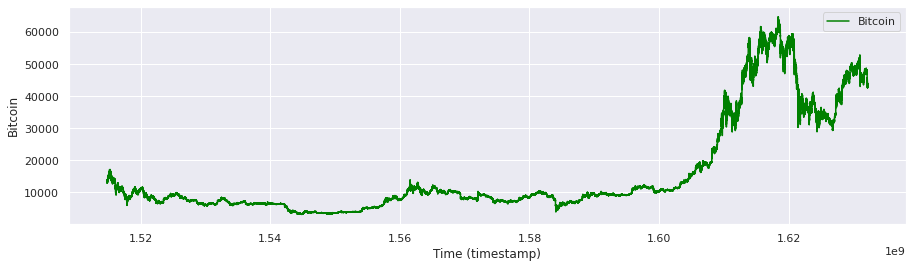

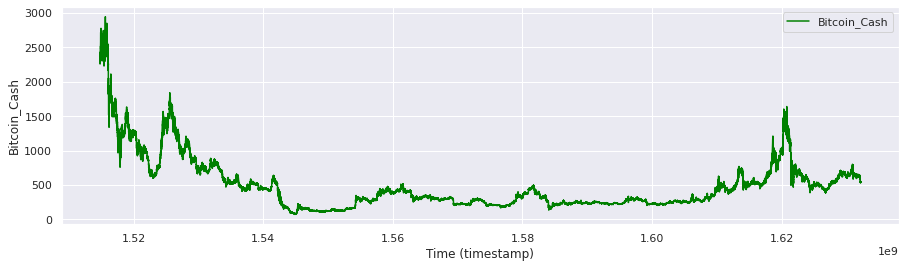

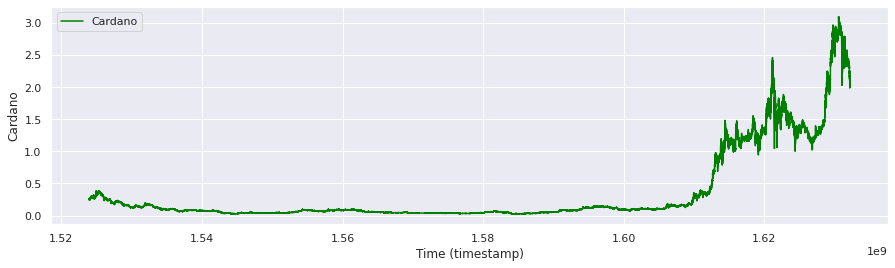

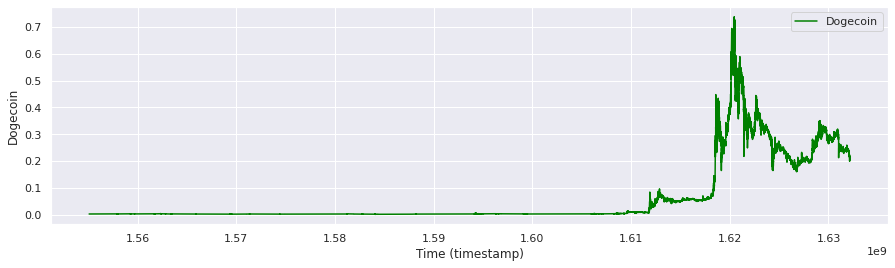

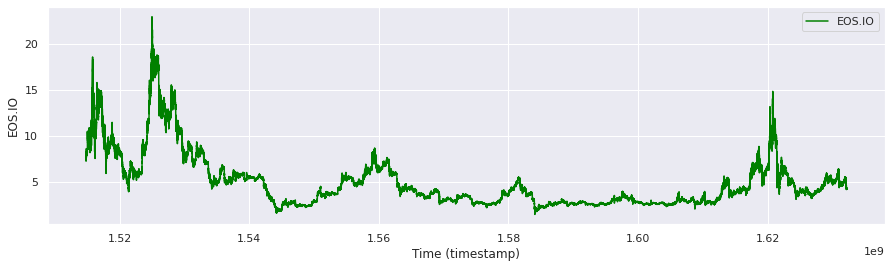

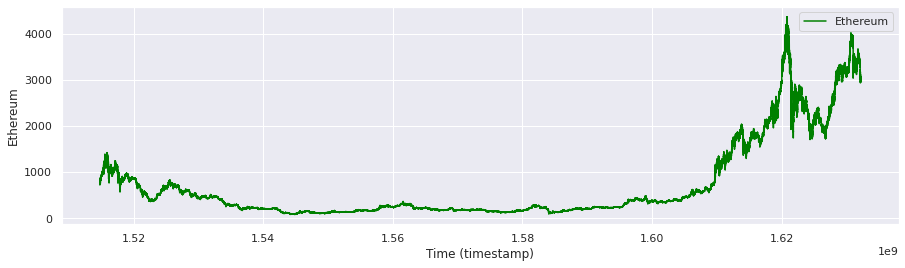

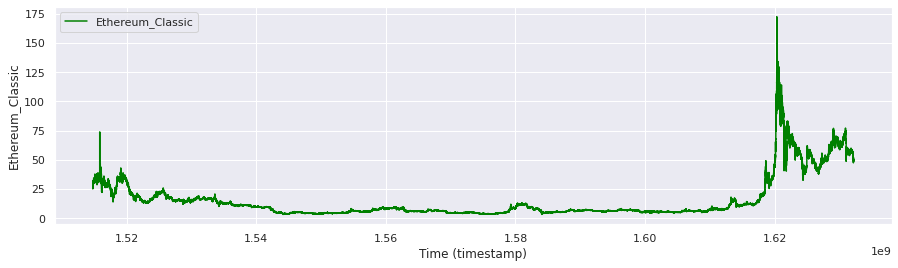

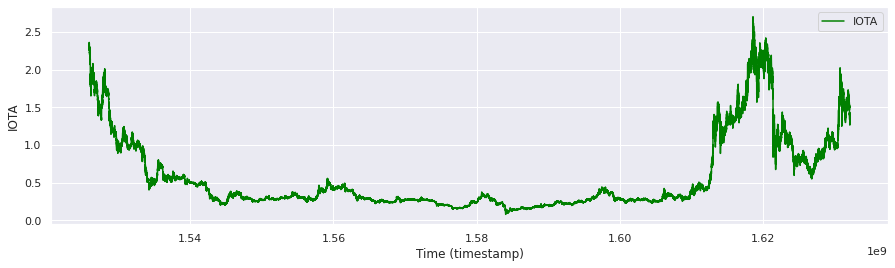

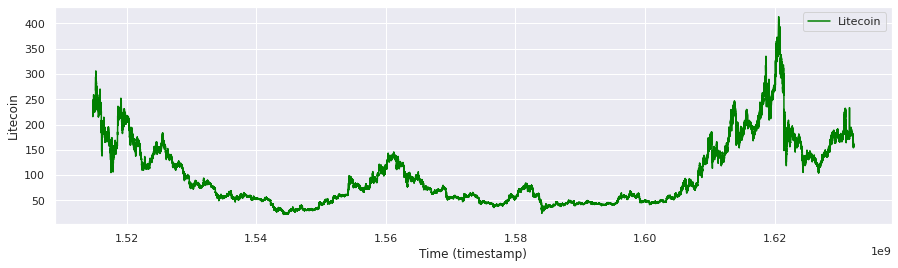

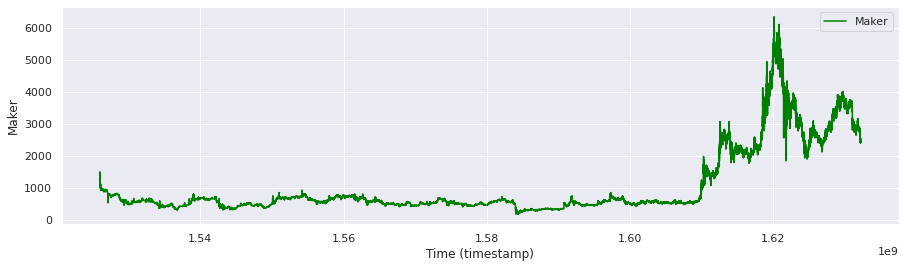

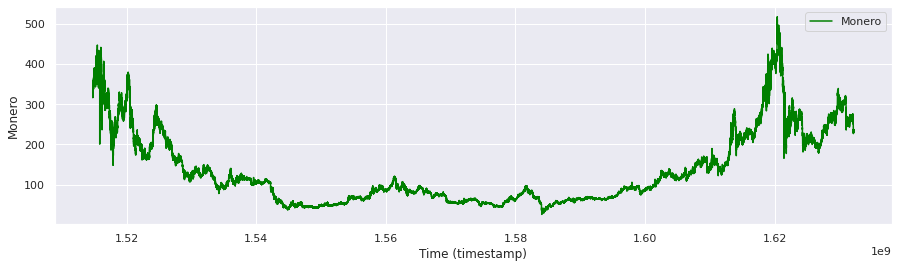

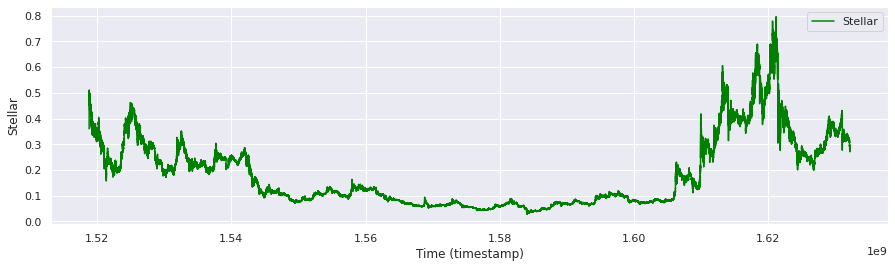

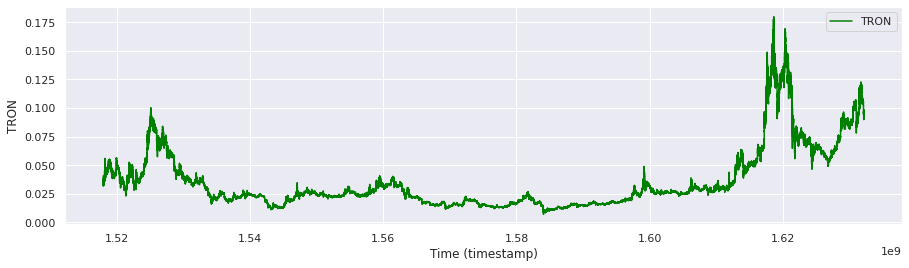

In [13]:
for i in dict1: 
    plt.figure(figsize=(15,4))
    dict1[i] = dict1[i].reindex(range(dict1[i].index[0],dict1[i].index[-1]+60,60),method='pad')
    plt.plot(dict1[i]['Close'], color='green', label=i)
    plt.legend()
    plt.xlabel('Time (timestamp)')
    plt.ylabel(i)
    plt.show()